# Aufgabenstellung

Für ein Heizsystem wird ein Glastubus verwendet. Durch eine regelbare Stromzufuhr wird Wärme generiert.
Je mehr Strom eingespeist wird, desto wärmer wird der Tubus.
Dieser Tubus gibt Wärme an seine Umgebung ab.
Dies geschieht Proportional zu der Oberfläche des Tubus
und des Temperaturunterschiedes zwischen dem Tubus und der Umgebungstemperatur.
Das Gleichgewicht des Temperatur-Verlustes und der Wärmeerzeugung lässt sich durch folgende Differentialgleichung ausdrücken:

$\begin{align}
m\cdot c_P \frac{dT}{dt} &= Q \\
Q&=q_{in}-q_{out} \\
q_{in} &= q \\
q_{out} &=h_s \cdot A_s(T-T_a)
\end{align}$

Das Ziel ist es, die Temperatur möglichst schnell mit wenig Schwankungen auf ein gewünschtes Niveau zu bringen.


# Aufgabe 1
In dieser Aufgabe soll die Differentialgleichung an einen Satz von Messdaten "gefittet" werden.
Hiebei sollen $m$ (Masse), sowie $A_s$ (Oberfläche), ermittelt werden.
Die Datei enthält Ergebnisse des Systems auf eine Sprungantwort.

Die angegebene Differentialgleichung lässt sich explizit lösen:

$T(t)=k_1e^{-\frac{T_a h_s t}{c_p m}} + \frac{q}{T_a h}+T_a$

$k_1$ wurde so gewählt, dass die Temperatur bei $0$ beginnt ($T(0) = 0$).

$k_1= -(\frac{q}{A_s h_s}+T_a)$

In [61]:
%matplotlib inline
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [62]:
#einlesen der Messdaten

my_data = np.genfromtxt('measurement_data.csv', delimiter=';')
xdata = my_data[:,0]
ydata = my_data[:,1]

In [63]:
#definition der konstanten

hs = 5
q = 1500
Ta = 20

In [64]:
#funktion zum fit 

def func(t, m, As):
    return ((-(q/(As*hs)+Ta))*np.e**(-(As*hs*t)/(1078*m))+q/(As*hs)+Ta)

In [65]:
#bestimmen der lösung durch fit

popt, pcov = curve_fit(func, xdata, ydata, p0=(1, 1), bounds=([0.1, 0.1],[30, 30]))

In [66]:
#ausgabe der ergebnisse

m = popt[0]
As = popt[1]

residuals = ydata - func(xdata, m, As)
fres = sum(np.abs(residuals))
print('fres: %6.2f ' % fres)
print('m: %6.2f' % m)
print('As: %6.2f' % As)

fres: 3917.39 
m:  14.34
As:   1.02


Text(0,0.5,'Y-data')

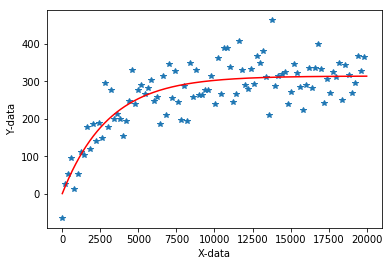

In [67]:
#plotten der ergebnisse

curvex = np.linspace(0,20000,10000)
curvey = func(curvex, m, As)

plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel("X-data")
plt.ylabel("Y-data")

In [68]:
#finden des grenzwertes

max_x = sc.optimize.fmin(lambda x: -func(x, m, As), 0)

Optimization terminated successfully.
         Current function value: -314.643006
         Iterations: 59
         Function evaluations: 147


# Annahmen
Der Anliegende Strom $q$, sowie die Umgebungstemperatur $T_a$, werden als konstant angesehen. Die Außentemperatur wird nicht durch den Tubus beeinflusst, was nicht ganz der Realität entspricht. Würde dies berücksichtig werden, so würde das Modell wesentlich komplexer werden.

# Auswertung
Die rote Kurve veranschaulicht den Temperaturunterschied von der Temperatur des Tubus zur Umgebungstemperatur. Die Eingabedaten sind als blaue Sterne markiert sind. Es ist zu erkennen, dass die Lösung gegen einen Grenzwert konvergiert ( $max_x = \tilde{}314.643$ ). Trotz starker Streuungen scheinen die Messdaten gegen den selben Wert zu laufen und weisen daher das gleiche Verhalten auf.

Der Tubus erwärmt sich solange, bis der Energieverlust zur Außenwelt ein Gleichgewicht mit der Leistung des Heizelementes bildet.

# Teil 2
ab jetzt werden die berechneten Werte für m und As eingesetzt, Ta und nocheinmal gefittes anhand der festen Werte

In [35]:
m = 16.49331431
As = 1.256637061
hs = 5

In [36]:
def func(t, q, Ta):
    return (-((q/(As*hs)+Ta)+Ta)*np.e**(-(As*hs*t)/(1078*m))+q/(As*hs)+Ta)

In [37]:
popt, pcov = curve_fit(func, xdata, ydata, p0=(1000, 30), bounds=([0, -20],[2000, 100]))
q  = popt[0]
Ta = popt[1]

residuals = ydata - func(xdata ,q, Ta)
fres = sum(np.abs(residuals))
print('fres: %6.2f ' % fres)
print('q: %6.2f' % q)
print('Ta: %6.2f' % Ta)

fres: 3938.01 
q: 1876.23
Ta:  14.21


Text(0,0.5,'Y-data')

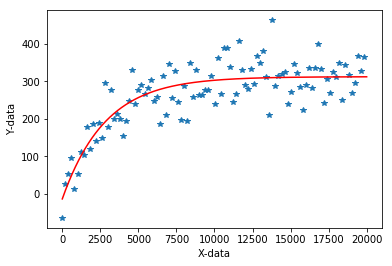

In [38]:
curvex= np.linspace(0,20000,10000)
curvey= func(curvex, q, Ta)
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')
plt.xlabel("X-data")
plt.ylabel("Y-data")

# -> wähle Ta als 14 Kelvin/Grad C
Nun ermittle maximale Temperatur des Tubus bei maximaler Heizleistung von 2kW

Berechnung: q_in = q_out, also Energieverlust pro Zeit ist gleich der Heizleistung von 2kW

In [39]:
Ta = 7.11

Die maximal zu erreichende Temperatur liegt bei: 325.41988629420985 (bei festem Ta von 7.11.


314.1176470588235

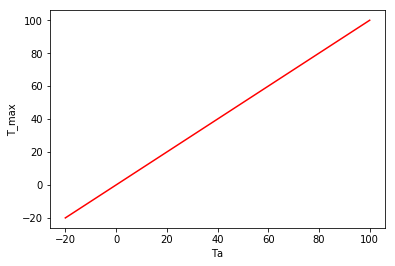

In [40]:
#2 - hs*As*(T-Ta)= 0
T_max = 2000/(hs*As)+Ta 
print ("Die maximal zu erreichende Temperatur liegt bei: {} (bei festem Ta von {}.".format(T_max, Ta))

def maxT(Ta_local):
    return 2000/(hs*As)+Ta_local

aussentemperatur = np.linspace(-20,100,120)
T_max= maxT(aussentemperatur)
plt.plot(aussentemperatur,aussentemperatur,'r')
plt.xlabel("Ta")
plt.ylabel("T_max")

2000/(hs*1.36)+20

Das System ist in dem Sinne linear, dass bei Doppelter Leistung sich auch eine doppelt so hohe Temperatur einstellt.

Text(0,0.5,'Y-data')

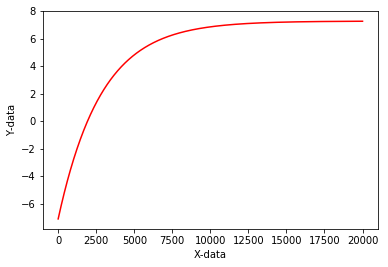

In [41]:
curvex= np.linspace(0,20000,1000)
curvey= func(curvex, 1, Ta)
plt.plot(curvex,curvey,'r')
plt.xlabel("X-data")
plt.ylabel("Y-data")

Das die Messadten im Negativen Bereich beginnen, sieht man in dem hier präsentierten Graphen. Die Temperatur steigt nimmt in den ersten 5000 Sekunden um 12 Grad zu, jedoch stellt sich die Endtemperatur erst nach ca 13000 Sekunden, bei 0 Grad ein. 

In [42]:
f = 1000000
#IST DAS SCHUMMELEI? MÖGLICH...
def u(t, f):
    return 1000*np.sin(np.pi*((f*2*t)%2))

In [43]:
for t in range(10):
    print(t, u(t/2, f))
#stelle diese Aufgabe zurück, frage mal nach: ist immer 0 gewollt? was für ein Offset?

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0


166.26494314710493


Text(0,0.5,'Y-data')

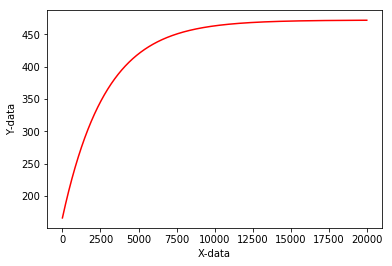

In [44]:
# simuliere constante von 1kW -> berechne erzielte Temperatur bei 1kW leistung
p_max = 1000
T_1kW = p_max/(hs*As)+Ta
print(T_1kW)

# Funktion der Temperatur, welche bei der einer Temperatur anfängt, welche bei einer Leistung von 1kW entsteht
def func_with_pre_temp(t, q, T_pre):
    return (-(q/(As*hs)+Ta)*np.e**(-(As*hs*t)/(1078*m))+q/(As*hs)+Ta)+T_pre

curvex= np.linspace(0,20000,10000)
curvey= func_with_pre_temp(curvex, q, T_1kW)
plt.plot(curvex,curvey,'r')
plt.xlabel("X-data")
plt.ylabel("Y-data")

In [45]:
def func_1(t, q, start_temp):
    return (-((q/(As*hs)+Ta)-start_temp)*np.e**(-(As*hs*t)/(1078*m))+q/(As*hs)+Ta)
    
q = 1000
time_offset = 0
start_temp = 0
curvex = np.arange(0, 300*60, 0.5)
curvey = np.arange(0, 300*60, 0.5)


m = 16.49
As = 1.35
Ta = 7.11

for i in range(len(curvex)):
    if(curvex[i] == 1800):
        q = 2000
        time_offset = 1800
        start_temp = curvey[i-1]
    curvey[i] = func_1(curvex[i]-time_offset, q, start_temp)

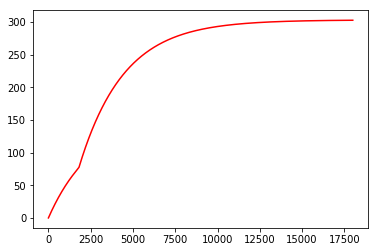

In [46]:
plt.plot(curvex, curvey, 'r')

In [47]:
print(curvey[4000])

93.42914537794094


In [48]:
curvex_3 = np.arange(0, 250*60, 0.5)
curvey_3 = np.arange(0, 250*60, 0.5)

start_temp = 0
for i in range(len(curvex_3)):
    q = 1000+(np.random.rand(1)-0.5)*1000
    curvey_3[i] = func_1(0.5, q, start_temp)
    start_temp =  curvey_3[i]

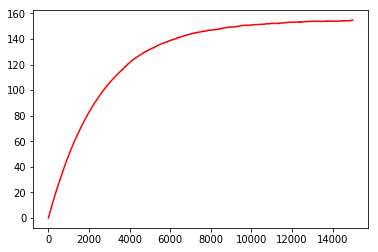

In [49]:
plt.plot(curvex_3, curvey_3, 'r')